## Assignment 
Please complete the following tasks.

1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?
2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4. Plot the distribution of average ETA by hours. How can this plot be explained?
5. BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [41]:
import pandas as pd
import numpy as np
import matplotlib

First import the data and then explore the data before we go deep in the questions

In [42]:
order = pd.read_csv("data_orders.csv")
offers = pd.read_csv("data_offers.csv")

In [43]:
print(
    order.shape, "\n",
    offers.shape
)

(10716, 8) 
 (334363, 2)


In [44]:
order.sample(n=10, random_state=43)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
8724,20:29:33,-0.948534,51.440262,NaN,3000583765878,4,0,36.0
350,21:23:23,-0.968731,51.453887,NaN,3000592470984,4,0,59.0
9150,08:23:34,-0.946245,51.451691,239.0,3000622165579,4,1,149.0
5850,19:07:41,-0.949086,51.447418,NaN,3000627407263,9,0,NaN
1854,17:31:43,-0.981301,51.424127,NaN,3000552370985,4,0,8.0
7480,20:58:24,-0.968669,51.453767,NaN,3000587456511,4,0,112.0
1256,00:17:09,-0.975687,51.457846,NaN,3000630782597,9,0,NaN
6614,02:05:57,-0.967506,51.454688,NaN,3000617000715,4,0,149.0
2238,19:07:34,-0.955500,51.453015,NaN,3000578727546,4,0,112.0
5425,15:14:28,-0.966276,51.437682,118.0,3000557286801,4,1,502.0


In [45]:
offers.sample(n=10,random_state=43)

,order_gk,offer_id
256959,3000554745568,300050680231
73802,3000627782039,300052098252
205095,3000624093106,300051883903
59640,3000577176734,300050810879
288798,3000623016398,300051814097
198582,3000590806132,300051336937
70837,3000578701807,300050897126
124655,3000577551653,300050835217
29550,3000623541659,300051851629
252049,3000630606142,300052304335


merge both data sets for better understanding of data under one dataframe 

In [46]:
df = order.merge(right=offers,how="inner", on="order_gk")

In [47]:
df.sample(n=10,random_state=43)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
3228,08:50:30,-0.941822,51.455532,NaN,3000623467476,9,0,NaN,300051845693
27019,21:48:10,-0.968922,51.457199,NaN,3000622491460,4,0,236.0,300051775802
30998,23:28:39,-0.946358,51.439779,NaN,3000555121087,4,0,152.0,300050704550
25474,07:58:18,-0.974199,51.475280,298.0,3000592771679,4,1,223.0,300051383440
6627,15:20:38,-0.917694,51.423399,NaN,3000578627488,9,0,NaN,300050891205
31000,23:28:39,-0.946358,51.439779,NaN,3000555121087,4,0,152.0,300050704569
10581,03:05:40,-0.968282,51.450638,NaN,3000617676143,4,0,12.0,300051731510
1144,08:02:00,-0.989201,51.472551,NaN,3000592121905,9,0,NaN,300051357584
16865,21:40:42,-0.934425,51.449892,NaN,3000627481490,4,0,80.0,300052086633
24927,07:53:20,-0.971480,51.458364,NaN,3000577801452,9,0,NaN,300050838682


understanding dataframe 
- order_datetime - time of the order
- origin_longitude - longitude of the order
- origin_latitude - latitude of the order
- m_order_eta - time before order arrival
- order_gk - order number
- order_status_key - status, an enumeration consisting of the following mapping: 4 - cancelled by client, 9 - cancelled by system, i.e., a reject
- is_driver_assigned_key - whether a driver has been assigned
- cancellation_time_in_seconds - how many seconds passed before cancellation
- offer_id - ID of an offer

So now we understand the column headers means and so we can convert the data into more meaningful format \
column - is_driver_assigned_key and Order_status_key

In [48]:
df["order_status"] = np.where(df["order_status_key"]==4,"Cancelled by Client", "Rejected")
df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"]==0,"No", "Yes")
df.drop(columns=["order_status_key","is_driver_assigned_key"], inplace=True)
df.rename(columns={
    "order_datetime": "order_time"},
    inplace = True
    )

In [49]:
df.sample(n=10,random_state=44)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,order_status,is_driver_assigned
7960,01:36:30,-0.996075,51.449174,NaN,3000579600634,NaN,300050935504,Rejected,No
5575,02:53:38,-0.971537,51.460114,119.0,3000551995423,185.0,300050592101,Cancelled by Client,Yes
17723,08:35:15,-0.958416,51.466037,NaN,3000622816548,58.0,300051790335,Cancelled by Client,No
28375,16:41:09,-0.975500,51.431881,60.0,3000556246110,73.0,300050743552,Cancelled by Client,Yes
17740,11:00:40,-0.969582,51.451689,117.0,3000622866583,479.0,300051798726,Cancelled by Client,Yes
16684,18:28:18,-0.976971,51.455099,NaN,3000627406077,189.0,300052080217,Cancelled by Client,No
2941,12:35:34,-0.967028,51.426098,838.0,3000623566047,211.0,300051852449,Cancelled by Client,Yes
8347,01:35:33,-0.972046,51.457948,NaN,3000579600604,33.0,300050935476,Cancelled by Client,No
2832,16:47:14,-0.957525,51.454010,NaN,3000623666644,145.0,300051859739,Cancelled by Client,No
3059,15:12:28,-0.957340,51.456278,NaN,3000623617169,102.0,300051856280,Cancelled by Client,No


In [50]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False])

This clear that data is clear and now understandable. So, we can jump to Q1 \
Build up distribution of orders according to reasons for failure: \
cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [51]:
df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count()

is_driver_assigned  order_status       
No                  Cancelled by Client    13435
                    Rejected                9469
Yes                 Cancelled by Client     8360
                    Rejected                   4
Name: order_gk, dtype: int64

<AxesSubplot: >

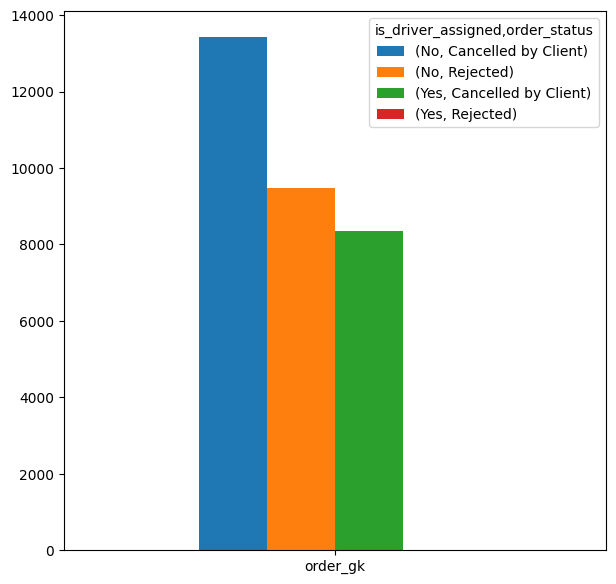

In [52]:
df_q1 = df.pivot_table(
    columns=["is_driver_assigned", "order_status"], 
    values="order_gk", 
    aggfunc="count")
    
df_q1.plot(
    kind="bar", 
    subplots=False, 
    figsize=(7, 7), 
    legend=True, 
    rot=0)

In [53]:
df_q1

is_driver_assigned                  No                          Yes         
order_status       Cancelled by Client Rejected Cancelled by Client Rejected
order_gk                         13435     9469                8360        4

Question 2 \
Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained? \
This question builds up upon the previous one by diving deeper into the analysis of failed orders. Rather than just plotting the distribution of fails by category (reason for cancellation, and the driver assignment), we want to know when these fails occur, and if there is some specific period in the day when one category prevails over others.

In [54]:
# split the order_time by hours and extract the hours
df["order_hour"] = df["order_time"].str.split(":").apply(lambda x : x[0])

In [55]:
df.head(2)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,order_status,is_driver_assigned,order_hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Cancelled by Client,Yes,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,Cancelled by Client,No,20


<AxesSubplot: title={'center': 'Count of Failed Orders by Hour of Day'}, xlabel='order_hour'>

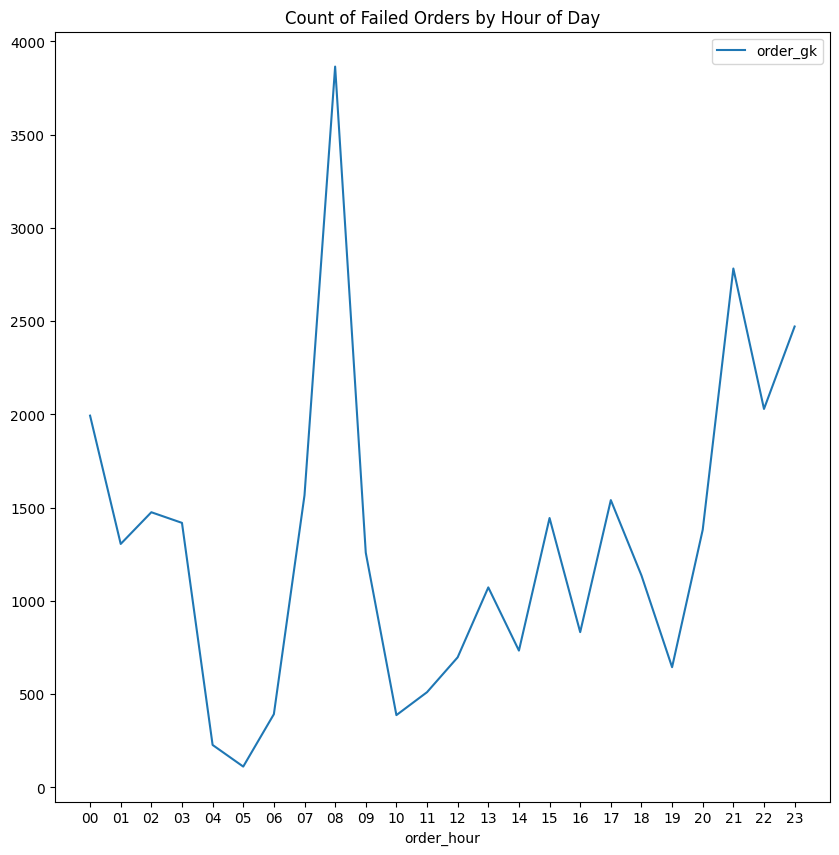

In [56]:
df.groupby(by="order_hour")["order_gk"].count().plot(
    figsize=(10,10),
    kind="line",
    legend=True,
    xticks=range(0, 24),
    title="Count of Failed Orders by Hour of Day"
)

In [57]:
grouped_q2 = df.groupby(by=["order_hour", "is_driver_assigned", "order_status"])["order_gk"].count()
#print(grouped_q2.to_string())

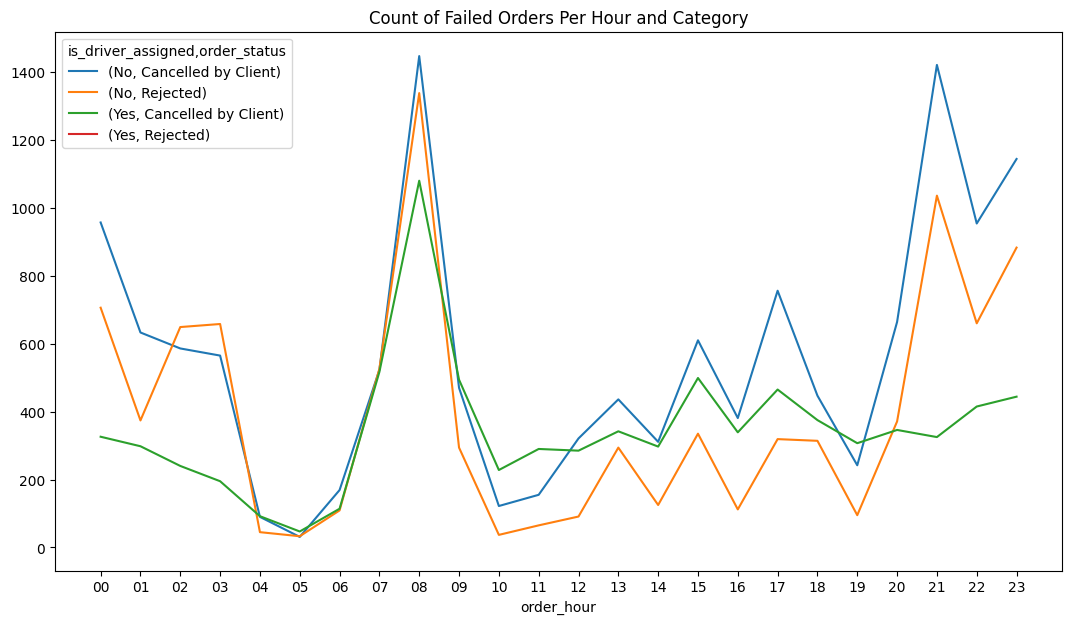

In [58]:
_ = grouped_q2.reset_index().pivot(index="order_hour",
                                   columns=["is_driver_assigned", "order_status"],
                                   values="order_gk").plot(xticks=range(0, 24),
                                                           figsize=(13, 7),
                                                           title="Count of Failed Orders Per Hour and Category")

Que 3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

First, we will aggregate the DataFrame by the order hour and the driver-assignment flag. Then, we will aggregate the cancellations_time_in_seconds column with the function mean. This will give us the required, aggregated information.

In [59]:
q3 = df.groupby(by=["order_hour","is_driver_assigned"])["cancellations_time_in_seconds"].mean()
q3

order_hour  is_driver_assigned
00          No                    115.126437
            Yes                   276.082822
01          No                    100.593997
            Yes                   296.312081
02          No                    121.305461
            Yes                   301.466667
03          No                    129.182301
            Yes                   368.682051
04          No                    100.733333
            Yes                   245.250000
05          No                    102.838710
            Yes                   156.617021
06          No                    202.952663
            Yes                   225.508772
07          No                    141.177820
            Yes                   177.640232
08          No                    132.625432
            Yes                   172.896296
09          No                    138.014894
            Yes                   230.821862
10          No                     93.795082
            Yes         

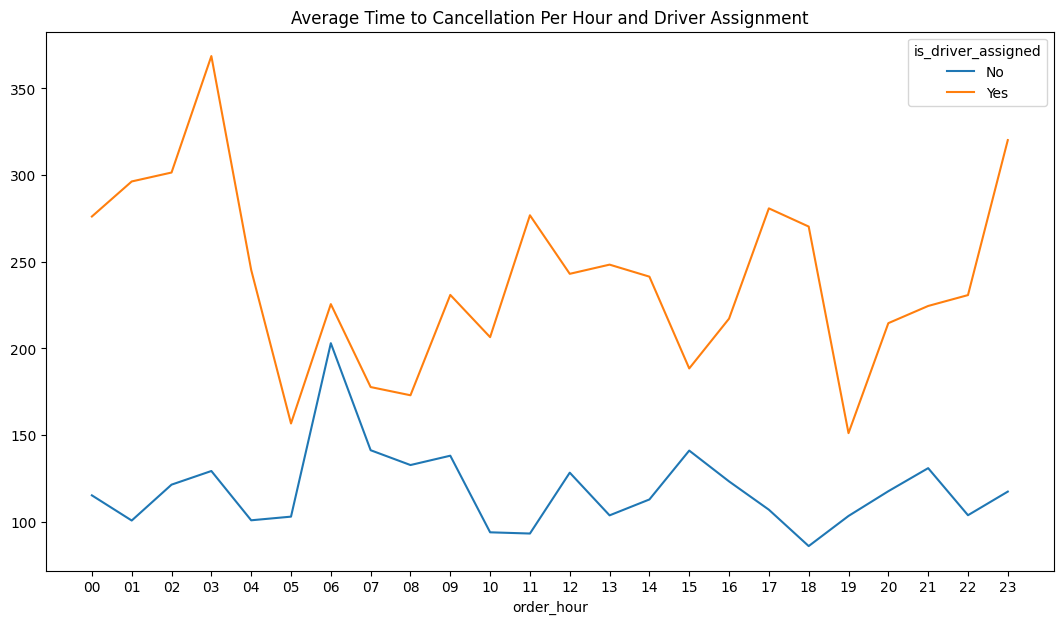

In [60]:
q3 = q3.reset_index()
_ = q3.pivot(index ="order_hour",
columns = "is_driver_assigned",
values = "cancellations_time_in_seconds").plot(xticks=range(0, 24),
                                                figsize=(13, 7),
                                                title="Average Time to Cancellation Per Hour and Driver Assignment")


Que 4. Plot the distribution of average ETA by hours. How can this plot be explained?

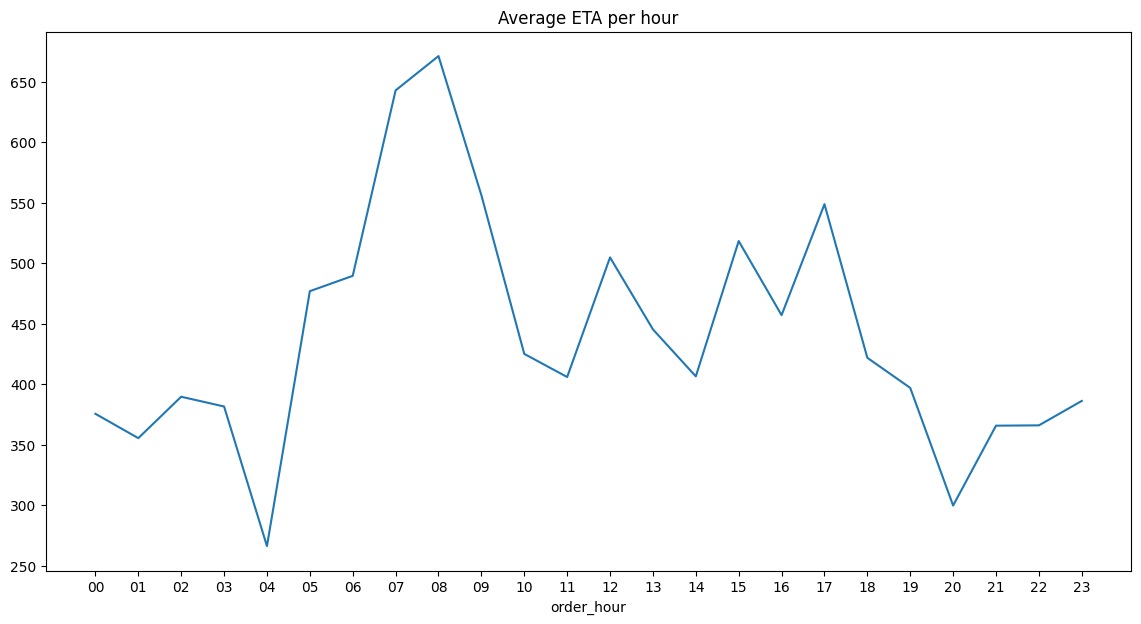

In [61]:
_ = df.groupby(by=["order_hour"])["m_order_eta"].mean().plot(
    figsize=(14,7),
    xticks=range(0,24),
    title="Average ETA per hour"
)

QUE 5. BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [62]:
import h3
import folium

In [63]:
df["hex_id"] = df.apply(
    func=lambda row: h3.geo_to_h3(lat=row["origin_latitude"], lng=row["origin_longitude"], resolution=8), axis=1)

In [64]:
grouped_q5 = df.groupby(by="hex_id")["order_gk"].count()
grouped_q5.shape

(139,)

In [65]:
grouped_q5 = grouped_q5.reset_index()
grouped_q5.sample(n=5, random_state=42)

,hex_id,order_gk
135,88195d74d1fffff,1
66,88195d2a33fffff,12
31,88195d2941fffff,52
118,88195d2b5dfffff,31
42,88195d2961fffff,5


In [66]:
grouped_q5 = grouped_q5.sort_values(by="order_gk")  # 1
total_orders = grouped_q5["order_gk"].sum()  # 2
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()  # 3
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders  # 4
grouped_q5[grouped_q5["cum_perc"] <= 80]  # 5

,hex_id,order_gk,cum_sum,cum_perc
137,88195d74d5fffff,1,1,0.003198
135,88195d74d1fffff,1,2,0.006396
79,88195d2aebfffff,1,3,0.009594
11,88195d282bfffff,1,4,0.012793
122,88195d3993fffff,1,5,0.015991
...,...,...,...,...
61,88195d2a27fffff,1295,15628,49.980811
20,88195d284dfffff,1937,17565,56.175643
91,88195d2b19fffff,1960,19525,62.444032
87,88195d2b11fffff,2191,21716,69.451196


There are 137 rows in the final output, and 139 rows in the original grouped DataFrame, meaning that 137 hexagons contain around 80% of data, and only 2 hexagons contain the other 20%!

In [67]:
map = folium.Map(location=[df["origin_latitude"].mean(), df["origin_longitude"].mean()],
                 zoom_start=8.5,  # after a bit of experimentation, we thought this presents the map best
                 tiles="cartodbpositron")

In [68]:
import json
import geojson


def to_geojson(row):
    """Transform hex_id into a geojson object."""
    geometry = {
        "type": "Polygon",
        "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"], geo_json=True)]
    }
    return geojson.Feature(id=row["hex_id"], geometry=geometry, properties={"order_gk": row["order_gk"]})


geojsons = grouped_q5.apply(func=to_geojson, axis=1).values.tolist()
geojson_str: str = json.dumps(geojson.FeatureCollection(geojsons))

In [69]:
# instantiate a colormap object for better visualisation
colormap = matplotlib.cm.get_cmap(name="plasma")
max_order_gk = grouped_q5["order_gk"].max()
min_order_gk = grouped_q5["order_gk"].min()

In [70]:
_ = folium.GeoJson(data=geojson_str, style_function=lambda f: {
    "fillColor": matplotlib.colors.to_hex(
        colormap((f["properties"]["order_gk"] - min_order_gk) / (max_order_gk - min_order_gk))),
    "color": "black",
    "weight": 1,
    "fillOpacity": 0.7
}).add_to(map)

In [71]:
map